In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Preprocess

Drop some rows and columns and Join OD data with latitude and longitude information.

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/content/drive/MyDrive/B A 데이터 모음/00클러스터링/Preprocessed_datasets/"

In [4]:
od_am = pd.read_csv(path + "OD_AMPEAK.csv")
od_pm = pd.read_csv(path + "OD_PMPEAK.csv")
location = pd.read_csv(path+ "좌표정보.csv", encoding = "CP949")

In [5]:
# drop two columns
od_am = od_am.drop(columns=["bus_and_subway", "transportation_total"])
od_pm = od_pm.drop(columns=["bus_and_subway", "transportation_total"])

In [6]:
od_am

Unnamed: 0   code_origin     code_dest gu_origin dong_origin gu_dest  \
0                0  1.111054e+09  1.111054e+09       종로구         삼청동     종로구   
1                1  1.111054e+09  1.111060e+09       종로구         삼청동     종로구   
2                2  1.111054e+09  1.111052e+09       종로구         삼청동     종로구   
3                3  1.111054e+09  1.111055e+09       종로구         삼청동     종로구   
4                4  1.111054e+09  1.111056e+09       종로구         삼청동     종로구   
...            ...           ...           ...       ...         ...     ...   
179771      179771  1.174068e+09  1.174065e+09       강동구          길동     강동구   
179772      179772  1.174068e+09  1.174066e+09       강동구          길동     강동구   
179773      179773  1.174068e+09  1.174069e+09       강동구          길동     강동구   
179774      179774  1.174068e+09  1.174070e+09       강동구          길동     강동구   
179775      179775  1.174068e+09  1.174068e+09       강동구          길동     강동구   

       dong_dest      car    taxi     bus  subway  
0            삼청동    0.687   0.052   0.960   0.056  
1            가회동    0.135   0.065   4.007   0.066  
2          청운효자동    0.844   0.862   0.920   0.110  
3            부암동   10.162   0.249   2.177   0.177  
4            평창동    0.498   0.055   0.143   0.012  
...          ...      ...     ...     ...     ...  
179771      성내2동    3.938   1.864  49.615  20.376  
179772      성내3동   36.794  21.696  28.375   0.607  
179773      둔촌1동    1.200   0.420   1.599  69.922  
179774      둔촌2동    0.293   0.065  43.949   0.157  
179775        길동  169.127  45.749  53.004  26.279  

[179776 rows x 11 columns]

In [7]:
location

Unnamed: 0   gu   dong        code        address          x           y
0             0  종로구  청운효자동  1111051500  서울시 종로구 청운효자동  37.583776  126.970663
1             1  종로구    사직동  1111053000    서울시 종로구 사직동  37.573878  126.970561
2             2  종로구    삼청동  1111054000    서울시 종로구 삼청동  37.590765  126.981016
3             3  종로구    부암동  1111055000    서울시 종로구 부암동  37.594759  126.965589
4             4  종로구    평창동  1111056000    서울시 종로구 평창동  37.613029  126.974503
..          ...  ...    ...         ...            ...        ...         ...
419         419  강동구   성내2동  1174065000   서울시 강동구 성내2동  37.534486  127.127931
420         420  강동구   성내3동  1174066000   서울시 강동구 성내3동  37.528451  127.133761
421         421  강동구     길동  1174068500     서울시 강동구 길동  37.539616  127.145929
422         422  강동구   둔촌1동  1174069000   서울시 강동구 둔촌1동  37.522886  127.140539
423         423  강동구   둔촌2동  1174070000   서울시 강동구 둔촌2동  37.531452  127.146715

[424 rows x 7 columns]

In [8]:
# add column name 'total', the sum of 4 transportation method
od_am['total'] = od_am[['car', 'taxi', 'bus', 'subway']].sum(axis=1)
od_pm['total'] = od_pm[['car', 'taxi', 'bus', 'subway']].sum(axis=1)

In [9]:
# drop the rows that has same origin and destination
od_am = od_am[~((od_am['gu_origin'] == od_am['gu_dest']) & (od_am['dong_origin'] == od_am['dong_dest']))]

In [10]:
# Perform the merge
merged_am = od_am.merge(location[['code', 'x', 'y']], left_on='code_origin', right_on='code', how='left')
merged_pm = od_pm.merge(location[['code', 'x', 'y']], left_on='code_origin', right_on='code', how='left')

In [11]:
merged_am

Unnamed: 0   code_origin     code_dest gu_origin dong_origin gu_dest  \
0                1  1.111054e+09  1.111060e+09       종로구         삼청동     종로구   
1                2  1.111054e+09  1.111052e+09       종로구         삼청동     종로구   
2                3  1.111054e+09  1.111055e+09       종로구         삼청동     종로구   
3                4  1.111054e+09  1.111056e+09       종로구         삼청동     종로구   
4                5  1.111054e+09  1.111053e+09       종로구         삼청동     종로구   
...            ...           ...           ...       ...         ...     ...   
179347      179770  1.174068e+09  1.174064e+09       강동구          길동     강동구   
179348      179771  1.174068e+09  1.174065e+09       강동구          길동     강동구   
179349      179772  1.174068e+09  1.174066e+09       강동구          길동     강동구   
179350      179773  1.174068e+09  1.174069e+09       강동구          길동     강동구   
179351      179774  1.174068e+09  1.174070e+09       강동구          길동     강동구   

       dong_dest      car    taxi      bus  subway    total        code  \
0            가회동    0.135   0.065    4.007   0.066    4.273  1111054000   
1          청운효자동    0.844   0.862    0.920   0.110    2.736  1111054000   
2            부암동   10.162   0.249    2.177   0.177   12.765  1111054000   
3            평창동    0.498   0.055    0.143   0.012    0.708  1111054000   
4            사직동    0.890   1.509    1.304   0.031    3.734  1111054000   
...          ...      ...     ...      ...     ...      ...         ...   
179347      성내1동  115.907   3.877  499.207   3.540  622.531  1174068500   
179348      성내2동    3.938   1.864   49.615  20.376   75.793  1174068500   
179349      성내3동   36.794  21.696   28.375   0.607   87.472  1174068500   
179350      둔촌1동    1.200   0.420    1.599  69.922   73.141  1174068500   
179351      둔촌2동    0.293   0.065   43.949   0.157   44.464  1174068500   

                x           y  
0       37.590765  126.981016  
1       37.590765  126.981016  
2       37.590765  126.981016  
3       37.590765  126.981016  
4       37.590765  126.981016  
...           ...         ...  
179347  37.539616  127.145929  
179348  37.539616  127.145929  
179349  37.539616  127.145929  
179350  37.539616  127.145929  
179351  37.539616  127.145929  

[179352 rows x 15 columns]

In [12]:
merged_am.rename(columns={'x': 'origin_x'}, inplace=True)
merged_am.rename(columns={'y': 'origin_y'}, inplace=True)
merged_am.drop(columns=['Unnamed: 0', 'code'], inplace = True)

merged_pm.rename(columns={'x': 'origin_x'}, inplace=True)
merged_pm.rename(columns={'y': 'origin_y'}, inplace=True)
merged_pm.drop(columns=['Unnamed: 0', 'code'], inplace = True)

In [13]:
merged_am

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
1       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
2       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
3       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
4       1.111054e+09  1.111053e+09       종로구         삼청동     종로구       사직동   
...              ...           ...       ...         ...     ...       ...   
179347  1.174068e+09  1.174064e+09       강동구          길동     강동구      성내1동   
179348  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179349  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179350  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179351  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   

            car    taxi      bus  subway    total   origin_x    origin_y  
0         0.135   0.065    4.007   0.066    4.273  37.590765  126.981016  
1         0.844   0.862    0.920   0.110    2.736  37.590765  126.981016  
2        10.162   0.249    2.177   0.177   12.765  37.590765  126.981016  
3         0.498   0.055    0.143   0.012    0.708  37.590765  126.981016  
4         0.890   1.509    1.304   0.031    3.734  37.590765  126.981016  
...         ...     ...      ...     ...      ...        ...         ...  
179347  115.907   3.877  499.207   3.540  622.531  37.539616  127.145929  
179348    3.938   1.864   49.615  20.376   75.793  37.539616  127.145929  
179349   36.794  21.696   28.375   0.607   87.472  37.539616  127.145929  
179350    1.200   0.420    1.599  69.922   73.141  37.539616  127.145929  
179351    0.293   0.065   43.949   0.157   44.464  37.539616  127.145929  

[179352 rows x 13 columns]

In [14]:
# Perform the merge
merged_am = merged_am.merge(location[['code', 'x', 'y']], left_on='code_dest', right_on='code', how='left')
merged_pm = merged_pm.merge(location[['code', 'x', 'y']], left_on='code_dest', right_on='code', how='left')

In [15]:
merged_am

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
1       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
2       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
3       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
4       1.111054e+09  1.111053e+09       종로구         삼청동     종로구       사직동   
...              ...           ...       ...         ...     ...       ...   
179347  1.174068e+09  1.174064e+09       강동구          길동     강동구      성내1동   
179348  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179349  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179350  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179351  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   

            car    taxi      bus  subway    total   origin_x    origin_y  \
0         0.135   0.065    4.007   0.066    4.273  37.590765  126.981016   
1         0.844   0.862    0.920   0.110    2.736  37.590765  126.981016   
2        10.162   0.249    2.177   0.177   12.765  37.590765  126.981016   
3         0.498   0.055    0.143   0.012    0.708  37.590765  126.981016   
4         0.890   1.509    1.304   0.031    3.734  37.590765  126.981016   
...         ...     ...      ...     ...      ...        ...         ...   
179347  115.907   3.877  499.207   3.540  622.531  37.539616  127.145929   
179348    3.938   1.864   49.615  20.376   75.793  37.539616  127.145929   
179349   36.794  21.696   28.375   0.607   87.472  37.539616  127.145929   
179350    1.200   0.420    1.599  69.922   73.141  37.539616  127.145929   
179351    0.293   0.065   43.949   0.157   44.464  37.539616  127.145929   

              code          x           y  
0       1111060000  37.582012  126.986465  
1       1111051500  37.583776  126.970663  
2       1111055000  37.594759  126.965589  
3       1111056000  37.613029  126.974503  
4       1111053000  37.573878  126.970561  
...            ...        ...         ...  
179347  1174064000  37.529070  127.125644  
179348  1174065000  37.534486  127.127931  
179349  1174066000  37.528451  127.133761  
179350  1174069000  37.522886  127.140539  
179351  1174070000  37.531452  127.146715  

[179352 rows x 16 columns]

In [16]:
merged_am.rename(columns={'x': 'dest_x'}, inplace=True)
merged_am.rename(columns={'y': 'dest_y'}, inplace=True)
merged_am.drop(columns=['code'], inplace = True)

merged_pm.rename(columns={'x': 'dest_x'}, inplace=True)
merged_pm.rename(columns={'y': 'dest_y'}, inplace=True)
merged_pm.drop(columns=['code'], inplace = True)

In [17]:
merged_am

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
1       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
2       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
3       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
4       1.111054e+09  1.111053e+09       종로구         삼청동     종로구       사직동   
...              ...           ...       ...         ...     ...       ...   
179347  1.174068e+09  1.174064e+09       강동구          길동     강동구      성내1동   
179348  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179349  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179350  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179351  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   

            car    taxi      bus  subway    total   origin_x    origin_y  \
0         0.135   0.065    4.007   0.066    4.273  37.590765  126.981016   
1         0.844   0.862    0.920   0.110    2.736  37.590765  126.981016   
2        10.162   0.249    2.177   0.177   12.765  37.590765  126.981016   
3         0.498   0.055    0.143   0.012    0.708  37.590765  126.981016   
4         0.890   1.509    1.304   0.031    3.734  37.590765  126.981016   
...         ...     ...      ...     ...      ...        ...         ...   
179347  115.907   3.877  499.207   3.540  622.531  37.539616  127.145929   
179348    3.938   1.864   49.615  20.376   75.793  37.539616  127.145929   
179349   36.794  21.696   28.375   0.607   87.472  37.539616  127.145929   
179350    1.200   0.420    1.599  69.922   73.141  37.539616  127.145929   
179351    0.293   0.065   43.949   0.157   44.464  37.539616  127.145929   

           dest_x      dest_y  
0       37.582012  126.986465  
1       37.583776  126.970663  
2       37.594759  126.965589  
3       37.613029  126.974503  
4       37.573878  126.970561  
...           ...         ...  
179347  37.529070  127.125644  
179348  37.534486  127.127931  
179349  37.528451  127.133761  
179350  37.522886  127.140539  
179351  37.531452  127.146715  

[179352 rows x 15 columns]

In [18]:
am_peak = merged_am
pm_peak = merged_pm

In [19]:
am_peak.to_csv("AMPEAK.csv")
pm_peak.to_csv("PMPEAK.csv")

End Merge OD data to coordinate information

# 2. Statistics

In [20]:
# Select some columns about region and transportation methods
selected_columns = ["dong_origin", "dong_dest", "car", "taxi", "bus", "subway", "total"]
am_selected = am_peak[selected_columns]
pm_selected = pm_peak[selected_columns]

In [21]:
am_selected.describe()

car           taxi            bus         subway  \
count  179352.000000  179352.000000  179352.000000  179352.000000   
mean        4.467919       0.771198       3.740953       4.902831   
std        30.683193       7.833841      32.247364      39.923781   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.071000       0.001000       0.001000       0.094000   
75%         1.117000       0.047000       0.236000       1.201000   
max      5007.257000     528.249000    2602.173000    3282.048000   

               total  
count  179352.000000  
mean       13.882900  
std        70.974478  
min         0.000000  
25%         0.000000  
50%         0.654000  
75%         5.357000  
max      5250.784000

In [22]:
pm_selected.describe()

car           taxi            bus         subway  \
count  179776.000000  179776.000000  179776.000000  179776.000000   
mean        4.327121       1.069656       2.857497       4.137653   
std        34.587081      13.363219      24.456104      37.603319   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.059000       0.002000       0.002000       0.077000   
75%         0.939000       0.067000       0.186000       0.933000   
max      6050.520000    1354.078000    2407.245000    2818.066000   

               total  
count  179776.000000  
mean       12.391927  
std        69.774877  
min         0.000000  
25%         0.000000  
50%         0.507000  
75%         4.297000  
max      6305.669000

# 3. Visualization


## Scaling <br>
min-max scaling for ease of visualization

In [23]:
import matplotlib.pyplot as plt

In [24]:
am_peak

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
1       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
2       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
3       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
4       1.111054e+09  1.111053e+09       종로구         삼청동     종로구       사직동   
...              ...           ...       ...         ...     ...       ...   
179347  1.174068e+09  1.174064e+09       강동구          길동     강동구      성내1동   
179348  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179349  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179350  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179351  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   

            car    taxi      bus  subway    total   origin_x    origin_y  \
0         0.135   0.065    4.007   0.066    4.273  37.590765  126.981016   
1         0.844   0.862    0.920   0.110    2.736  37.590765  126.981016   
2        10.162   0.249    2.177   0.177   12.765  37.590765  126.981016   
3         0.498   0.055    0.143   0.012    0.708  37.590765  126.981016   
4         0.890   1.509    1.304   0.031    3.734  37.590765  126.981016   
...         ...     ...      ...     ...      ...        ...         ...   
179347  115.907   3.877  499.207   3.540  622.531  37.539616  127.145929   
179348    3.938   1.864   49.615  20.376   75.793  37.539616  127.145929   
179349   36.794  21.696   28.375   0.607   87.472  37.539616  127.145929   
179350    1.200   0.420    1.599  69.922   73.141  37.539616  127.145929   
179351    0.293   0.065   43.949   0.157   44.464  37.539616  127.145929   

           dest_x      dest_y  
0       37.582012  126.986465  
1       37.583776  126.970663  
2       37.594759  126.965589  
3       37.613029  126.974503  
4       37.573878  126.970561  
...           ...         ...  
179347  37.529070  127.125644  
179348  37.534486  127.127931  
179349  37.528451  127.133761  
179350  37.522886  127.140539  
179351  37.531452  127.146715  

[179352 rows x 15 columns]

In [25]:
# Define the columns to be min-max scaled
columns_to_scale = ['car', 'taxi', 'bus', 'subway', 'total']
am_peak_scaled = am_peak.copy()

# Min-max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# Apply min-max scaling to the specified columns
for column in columns_to_scale:
    am_peak_scaled[column] = min_max_scaling(am_peak_scaled[column])

In [26]:
am_peak_scaled

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
1       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
2       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
3       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
4       1.111054e+09  1.111053e+09       종로구         삼청동     종로구       사직동   
...              ...           ...       ...         ...     ...       ...   
179347  1.174068e+09  1.174064e+09       강동구          길동     강동구      성내1동   
179348  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179349  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179350  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179351  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   

             car      taxi       bus    subway     total   origin_x  \
0       0.000027  0.000123  0.001540  0.000020  0.000814  37.590765   
1       0.000169  0.001632  0.000354  0.000034  0.000521  37.590765   
2       0.002029  0.000471  0.000837  0.000054  0.002431  37.590765   
3       0.000099  0.000104  0.000055  0.000004  0.000135  37.590765   
4       0.000178  0.002857  0.000501  0.000009  0.000711  37.590765   
...          ...       ...       ...       ...       ...        ...   
179347  0.023148  0.007339  0.191842  0.001079  0.118560  37.539616   
179348  0.000786  0.003529  0.019067  0.006208  0.014435  37.539616   
179349  0.007348  0.041072  0.010904  0.000185  0.016659  37.539616   
179350  0.000240  0.000795  0.000614  0.021304  0.013930  37.539616   
179351  0.000059  0.000123  0.016889  0.000048  0.008468  37.539616   

          origin_y     dest_x      dest_y  
0       126.981016  37.582012  126.986465  
1       126.981016  37.583776  126.970663  
2       126.981016  37.594759  126.965589  
3       126.981016  37.613029  126.974503  
4       126.981016  37.573878  126.970561  
...            ...        ...         ...  
179347  127.145929  37.529070  127.125644  
179348  127.145929  37.534486  127.127931  
179349  127.145929  37.528451  127.133761  
179350  127.145929  37.522886  127.140539  
179351  127.145929  37.531452  127.146715  

[179352 rows x 15 columns]

In [27]:
# Define the columns to be min-max scaled
columns_to_scale = ['car', 'taxi', 'bus', 'subway', 'total']
pm_peak_scaled = pm_peak.copy()

# Min-max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# Apply min-max scaling to the specified columns
for column in columns_to_scale:
    pm_peak_scaled[column] = min_max_scaling(pm_peak_scaled[column])

In [28]:
pm_peak_scaled

code_origin     code_dest gu_origin dong_origin gu_dest dong_dest  \
0       1.111054e+09  1.111054e+09       종로구         삼청동     종로구       삼청동   
1       1.111054e+09  1.111060e+09       종로구         삼청동     종로구       가회동   
2       1.111054e+09  1.111052e+09       종로구         삼청동     종로구     청운효자동   
3       1.111054e+09  1.111055e+09       종로구         삼청동     종로구       부암동   
4       1.111054e+09  1.111056e+09       종로구         삼청동     종로구       평창동   
...              ...           ...       ...         ...     ...       ...   
179771  1.174068e+09  1.174065e+09       강동구          길동     강동구      성내2동   
179772  1.174068e+09  1.174066e+09       강동구          길동     강동구      성내3동   
179773  1.174068e+09  1.174069e+09       강동구          길동     강동구      둔촌1동   
179774  1.174068e+09  1.174070e+09       강동구          길동     강동구      둔촌2동   
179775  1.174068e+09  1.174068e+09       강동구          길동     강동구        길동   

             car      taxi       bus    subway     total   origin_x  \
0       0.001202  0.043241  0.002289  0.000092  0.011354  37.590765   
1       0.000015  0.000808  0.000588  0.000016  0.000419  37.590765   
2       0.000029  0.000133  0.000080  0.000009  0.000091  37.590765   
3       0.000320  0.000068  0.000202  0.000014  0.000405  37.590765   
4       0.000155  0.000186  0.000118  0.000009  0.000238  37.590765   
...          ...       ...       ...       ...       ...        ...   
179771  0.003368  0.008649  0.106456  0.037345  0.062420  37.539616   
179772  0.005379  0.028873  0.006974  0.000226  0.014124  37.539616   
179773  0.000105  0.001428  0.000186  0.000796  0.000834  37.539616   
179774  0.000444  0.005929  0.015191  0.000109  0.007547  37.539616   
179775  0.016707  0.047166  0.023983  0.011064  0.040259  37.539616   

          origin_y     dest_x      dest_y  
0       126.981016  37.590765  126.981016  
1       126.981016  37.582012  126.986465  
2       126.981016  37.583776  126.970663  
3       126.981016  37.594759  126.965589  
4       126.981016  37.613029  126.974503  
...            ...        ...         ...  
179771  127.145929  37.534486  127.127931  
179772  127.145929  37.528451  127.133761  
179773  127.145929  37.522886  127.140539  
179774  127.145929  37.531452  127.146715  
179775  127.145929  37.539616  127.145929  

[179776 rows x 15 columns]

## Histograms for each transportation method in morning peak time

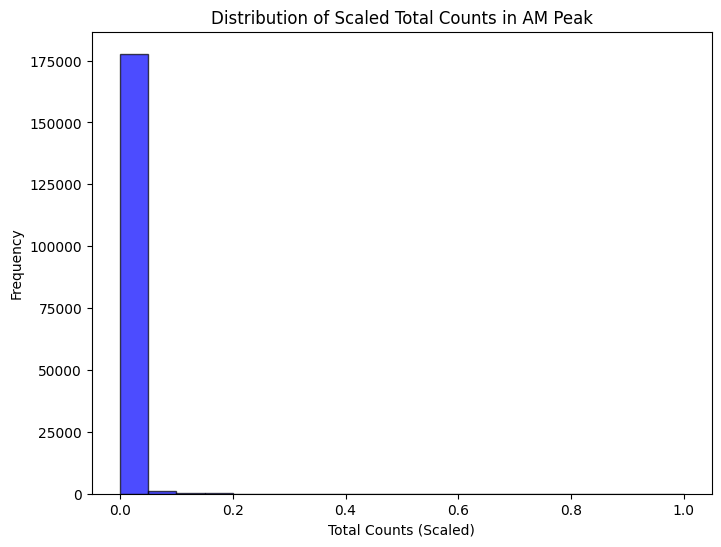

In [ ]:
# Extract the data for the 'total' column
total_data = am_peak_scaled['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(total_data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Total Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Total Counts in AM Peak')

plt.show()

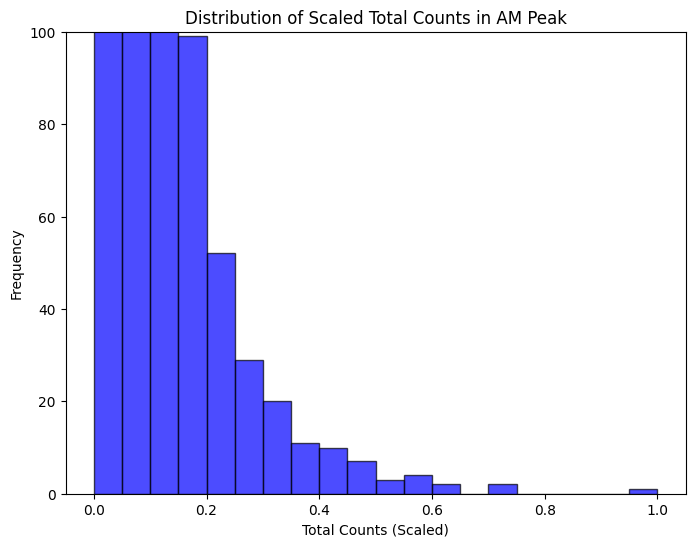

In [ ]:
# Extract the data for the 'total' column
total_data = am_peak_scaled['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(total_data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Total Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Total Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

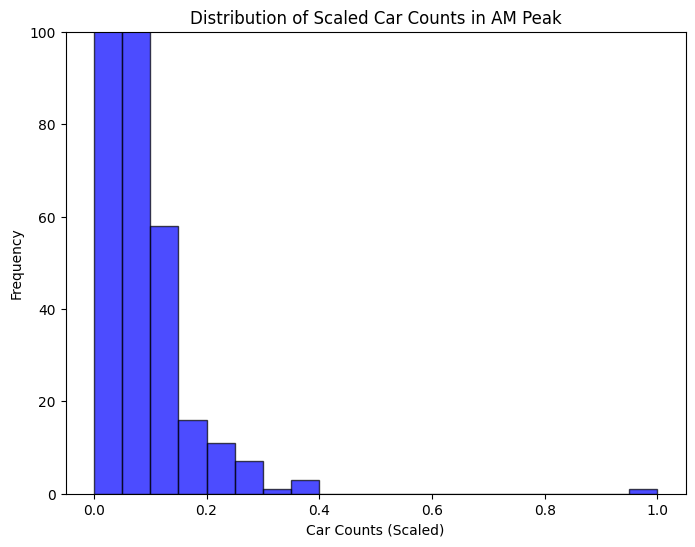

In [ ]:
# Extract the data for the 'total' column
data = am_peak_scaled['car']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Car Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Car Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

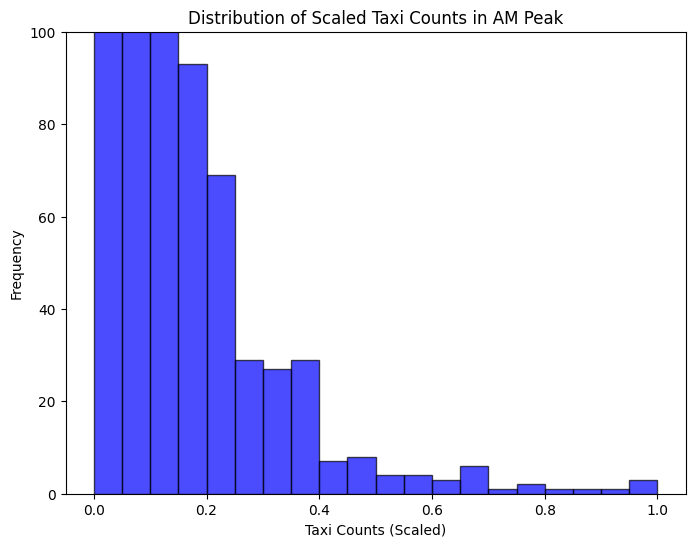

In [ ]:
# Extract the data for the 'taxi' column
data = am_peak_scaled['taxi']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Taxi Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Taxi Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

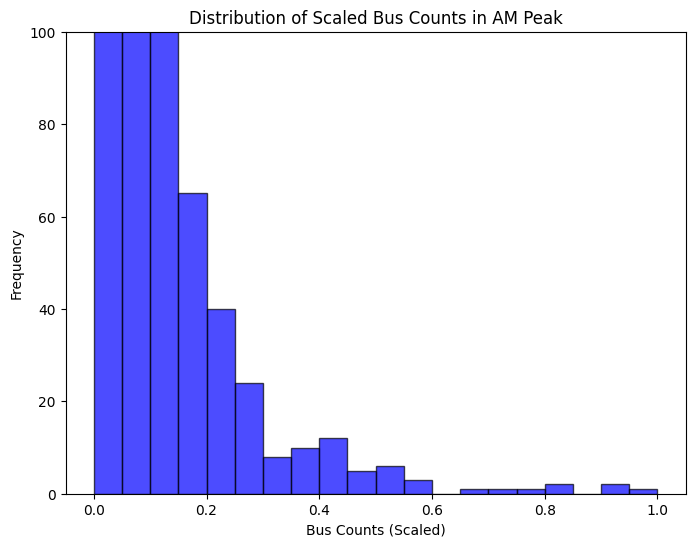

In [ ]:
# Extract the data for the 'bus' column
data = am_peak_scaled['bus']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Bus Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Bus Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

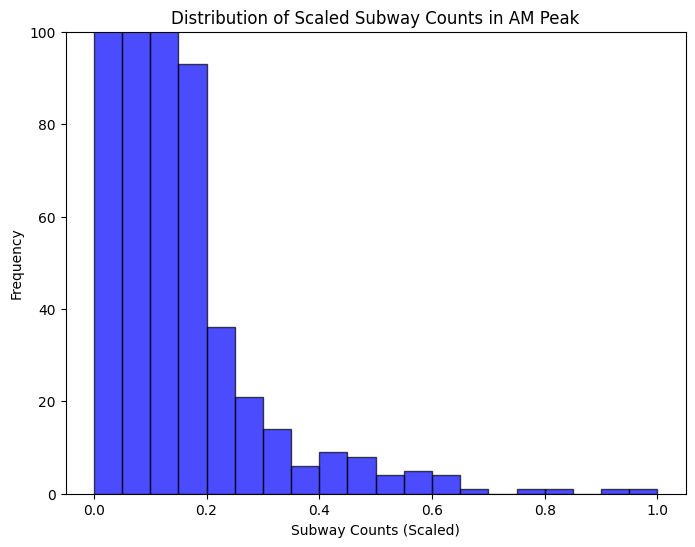

In [ ]:
# Extract the data for the 'subway' column
data = am_peak_scaled['subway']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Subway Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Subway Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

## Histograms for each transportation method in evening peak time

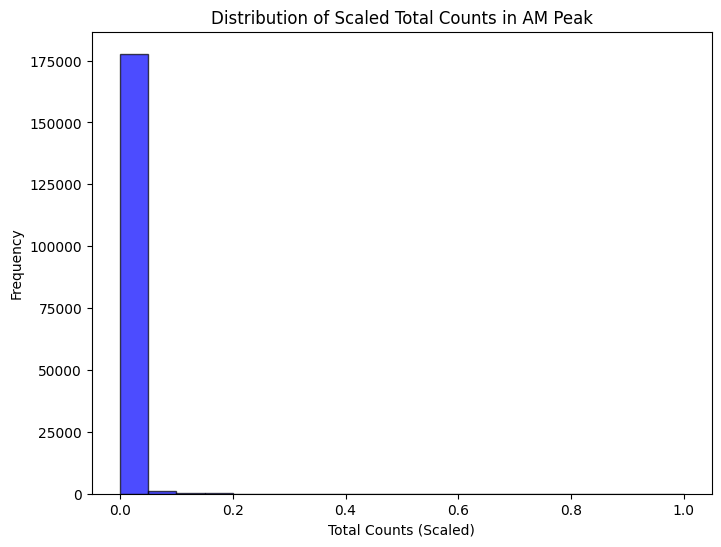

In [ ]:
# Extract the data for the 'total' column
total_data = am_peak_scaled['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(total_data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Total Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Total Counts in AM Peak')

plt.show()

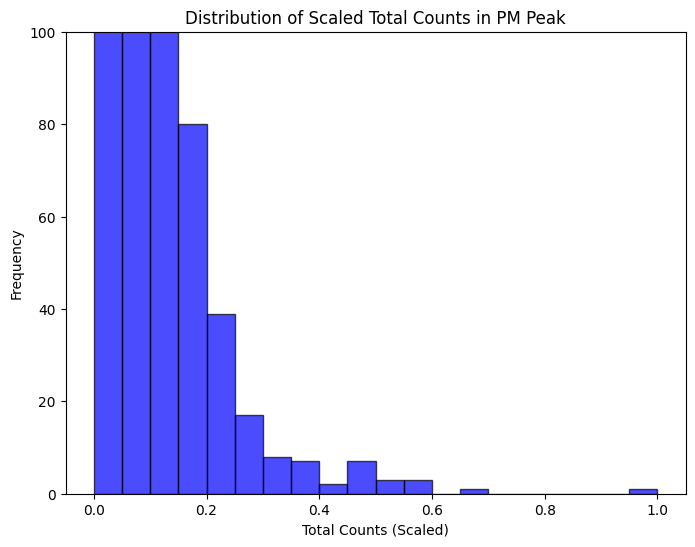

In [ ]:
# Extract the data for the 'total' column
total_data = pm_peak_scaled['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(total_data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Total Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Total Counts in PM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

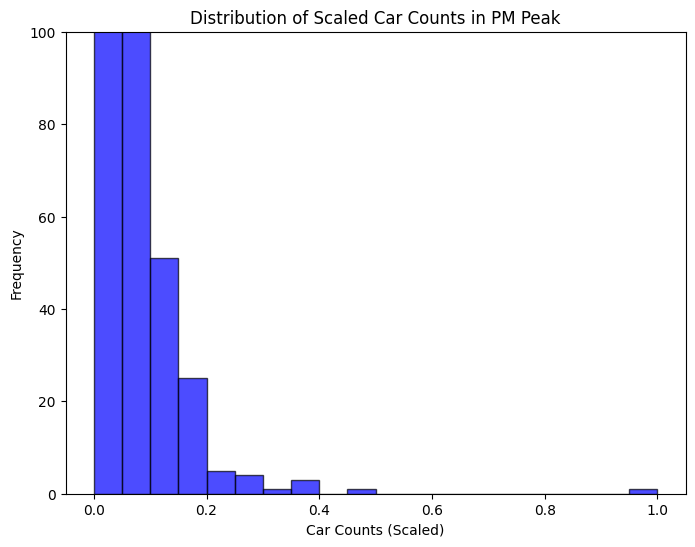

In [ ]:
# Extract the data for the 'total' column
data = pm_peak_scaled['car']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Car Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Car Counts in PM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

plt.show()

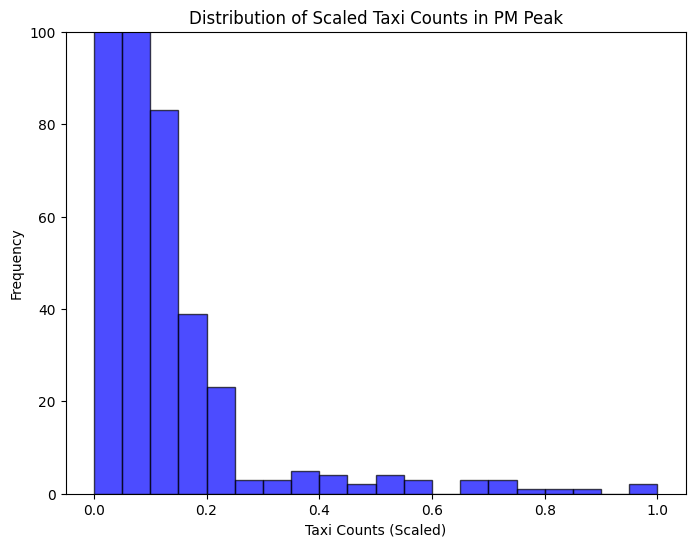

In [ ]:
# Extract the data for the 'taxi' column
data = pm_peak_scaled['taxi']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Taxi Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Taxi Counts in PM Peak')

# Set the y-axis range between 0 and 10000
plt.ylim(0, 100)

plt.show()

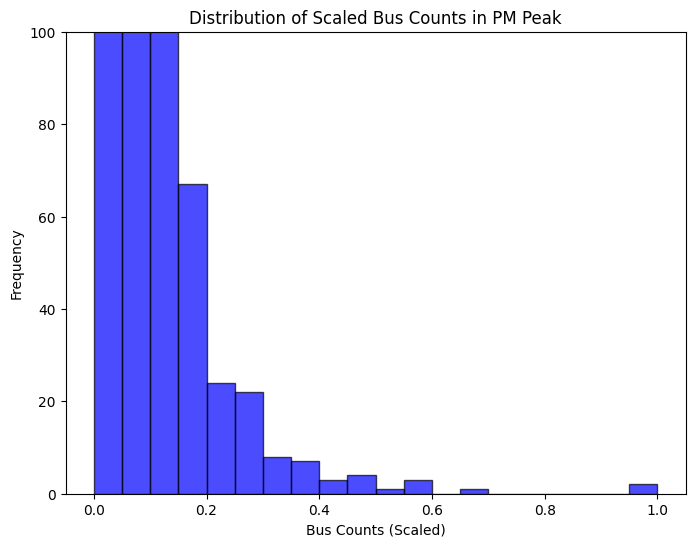

In [ ]:
# Extract the data for the 'bus' column
data = pm_peak_scaled['bus']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Bus Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Bus Counts in PM Peak')

# Set the y-axis range between 0 and 10000
plt.ylim(0, 100)

plt.show()

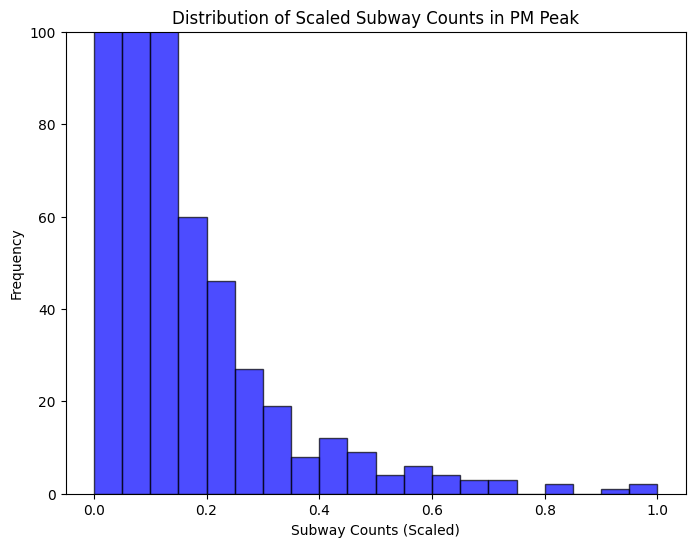

In [ ]:
# Extract the data for the 'subway' column
data = pm_peak_scaled['subway']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Subway Counts (Scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Subway Counts in PM Peak')

# Set the y-axis range between 0 and 10000
plt.ylim(0, 100)

plt.show()

## Visualize the amount of transportation from origin dong to destination dong with arcs

In [29]:
! pip install pydeck
import pydeck as pdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.7 MB/s eta 0:00:00


### AM Peak

In [30]:
# ArcLayer for top 1000 in the number of transportation by cars

df = am_peak_scaled.nlargest(1000, 'car')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="car * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{car} times <br /> from {dong_origin}(red) to {dong_dest}(green) by car"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_car_1000_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of transportation by cars
df = am_peak_scaled.nlargest(100, 'car')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="car * 50",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{car} times <br /> from {dong_origin}(red) to {dong_dest}(green) by car"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_car_100_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of transportation by taxi
df = am_peak_scaled.nlargest(1000, 'taxi')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="taxi * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{taxi} times <br /> from {dong_origin}(red) to {dong_dest}(green) by taxi"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_taxi_1000_arc_layer.html.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of transportation by buses
df = am_peak_scaled.nlargest(1000, 'bus')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="bus * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{bus} times <br /> from {dong_origin}(red) to {dong_dest}(green) by bus"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_bus_1000_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of transportation by subway
df = am_peak_scaled.nlargest(1000, 'subway')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 10.5  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="subway * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{subway} times <br /> from {dong_origin}(red) to {dong_dest}(green) by subway"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_subway_1000_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of total transportation methods
df = am_peak_scaled.nlargest(1000, 'total')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="total * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{total} times <br /> from {dong_origin}(red) to {dong_dest}(green) in total"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("am_total_1000_arc_layer.html")

<IPython.core.display.Javascript object>

### PM Peak

In [ ]:
# ArcLayer for top 1000 in cars
df = pm_peak_scaled.nlargest(1000, 'car')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="car * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{car} times <br /> from {dong_origin}(red) to {dong_dest}(green) by car"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("pm_car_1000_peak_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of taxi
df = pm_peak_scaled.nlargest(1000, 'taxi')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="taxi * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{taxi} times <br /> from {dong_origin}(red) to {dong_dest}(green) by taxi"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("pm_taxi_1000_peak_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of bus
df = pm_peak_scaled.nlargest(1000, 'bus')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="bus * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{bus} times <br /> from {dong_origin}(red) to {dong_dest}(green) by bus"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("pm_bus_1000_peak_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of subway
df = pm_peak_scaled.nlargest(1000, 'subway')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="subway * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{subway} times <br /> from {dong_origin}(red) to {dong_dest}(green) by subway"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("pm_subway_1000_peak_arc_layer.html")

<IPython.core.display.Javascript object>

In [ ]:
# ArcLayer for top 1000 in the number of total number of transportation methods
df = pm_peak_scaled.nlargest(1000, 'total')

initial_latitude = 37.5  # Replace with your desired latitude
initial_longitude = 127.0  # Replace with your desired longitude
initial_bearing = 0  # Replace with your desired bearing
initial_pitch = 50  # Replace with your desired pitch
initial_zoom = 11  # Replace with your desired zoom level


# A bounding box for Seoul, to help filter this commuter data
SEOUL_BOUNDING_BOX = [
    37.4267,
    126.7657,
    37.7010,
    127.1836,
]


def in_bounding_box(point):
    """Determine whether a point is in your specified bounding box"""
    lng, lat = point
    in_lng_bounds = SEOUL_BOUNDING_BOX[0] <= lat <= SEOUL_BOUNDING_BOX[2]
    in_lat_bounds = SEOUL_BOUNDING_BOX[1] <= lng <= SEOUL_BOUNDING_BOX[3]
    return in_lng_bounds and in_lat_bounds

# # Filter your data to the specified bounding box
# df = df[am_peak_df[["origin_y", "origin_x"]].apply(lambda row: in_bounding_box((row["origin_y"], row["origin_x"])), axis=1)]
# df = df[am_peak_df[["dest_y", "dest_x"]].apply(lambda row: in_bounding_box((row["dest_y"], row["dest_x"])), axis=1)]

GREEN_RGB = [0, 255, 0, 150]
RED_RGB = [240, 100, 0, 150]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="total * 10",  # Adjust to the appropriate width column
    get_source_position=["origin_y", "origin_x"],
    get_target_position=["dest_y", "dest_x"],
    get_tilt=1,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

# Define your initial view state (latitude, longitude, zoom, etc.)
view_state = pdk.ViewState(
    latitude=initial_latitude,
    longitude=initial_longitude,
    bearing=initial_bearing,
    pitch=initial_pitch,
    zoom=initial_zoom,
)

# Define tooltip text for the ArcLayer (customize as needed)
TOOLTIP_TEXT = {"html": "{total} times <br /> from {dong_origin}(red) to {dong_dest}(green) in total"}

# Create the deck.gl visualization
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

# Store by html
r.to_html("pm_total_1000_peak_arc_layer.html")

<IPython.core.display.Javascript object>